In [7]:
import glob
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import nglview as nv
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
import shutil

import MDAnalysis as mda
import MDAnalysis.transformations as trans
from MDAnalysis.analysis import align, rms, pca, diffusionmap, distances

import prolif as plf
from prolif.plotting.network import LigNetwork
from prolif.plotting.complex3d import Complex3D
from prolif.plotting.barcode import Barcode

sys.path.insert(0,"/opt/pymol-open-source/modules")
from extract_ligand_pymol import extract_ligand


In [8]:
res_dir = glob.glob("result2/*")

In [10]:
res_dir


['result2/4lxz',
 'result2/128270',
 'result2/31396',
 'result2/105992',
 'result2/84562',
 'result2/102203',
 'result2/67611',
 'result2/115382',
 'result2/71126',
 'result2/187930',
 'result2/162096']

In [3]:
def extractLigandFromPDB(file):
    if file.endswith(".sdf"):
        s = Chem.SDMolSupplier(file)
        mol = [v for v in s if v != None][0]
        pdbfile = file.replace(".sdf",".pdb")
        Chem.MolToPDBFile(mol,pdbfile)
    else:
        pdbfile = file
    with open(pdbfile) as f:
        text = f.read().split("\n")
    text = [v.split(" ") for v in text]
    text = [[v for v in x if v != ""] for x in text]
    pdb = []
    for v in text:
        if len(v) != 0 and v[0] == "HETATM":
            pdb.append(v[2])
    return pdb
    

In [11]:
for p in tqdm(res_dir):
    idx = p.split("/")[-1]
    md_universe = mda.Universe(p+"/minimized.pdb",p+"/trajectory.dcd")
    protein = md_universe.select_atoms("protein")
    ligand = md_universe.select_atoms("resname UNK")
    zinc = md_universe.select_atoms("resname  ZN")
    transforms = [trans.center_in_box(protein),trans.wrap(ligand),trans.wrap(zinc)]
    md_universe.trajectory.add_transformations(*transforms)
    writer = md_universe.trajectory.Writer("transformed2/{}.dcd".format(idx))
    for ts in range(len(md_universe.trajectory)):
        md_universe.trajectory[ts]
        writer.write(md_universe)
    shutil.copy(p+"/minimized.pdb","transformed2/{}.pdb".format(idx))

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "
/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


  0%|          | 0/500 [00:00<?, ?it/s]

[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:48:43] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

  0%|          | 0/500 [00:00<?, ?it/s]

[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:54:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

  0%|          | 0/500 [00:00<?, ?it/s]

[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[18:59:41] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

  0%|          | 0/500 [00:00<?, ?it/s]

[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:05:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

  0%|          | 0/500 [00:00<?, ?it/s]

[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:10:42] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

  0%|          | 0/500 [00:00<?, ?it/s]

[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:16:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

<Figure size 1300x400 with 0 Axes>

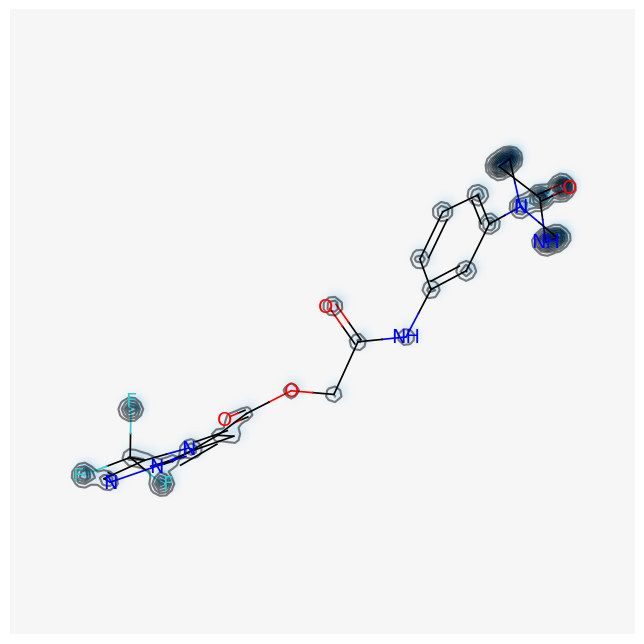

<Figure size 1300x400 with 0 Axes>

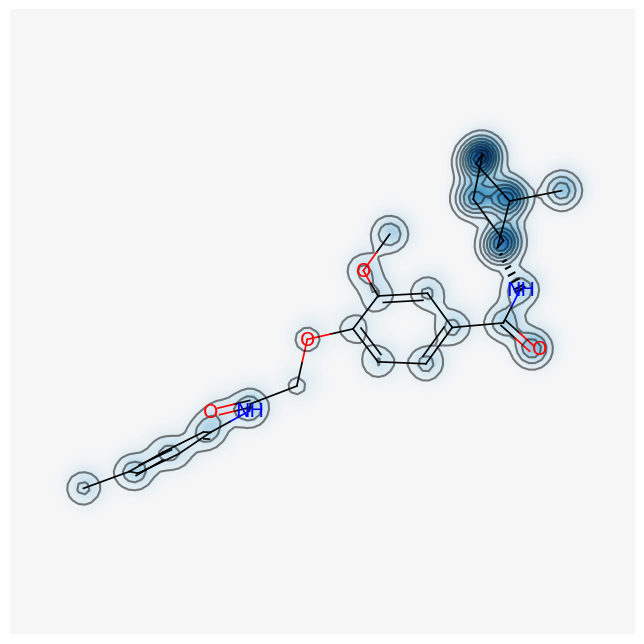

<Figure size 1300x400 with 0 Axes>

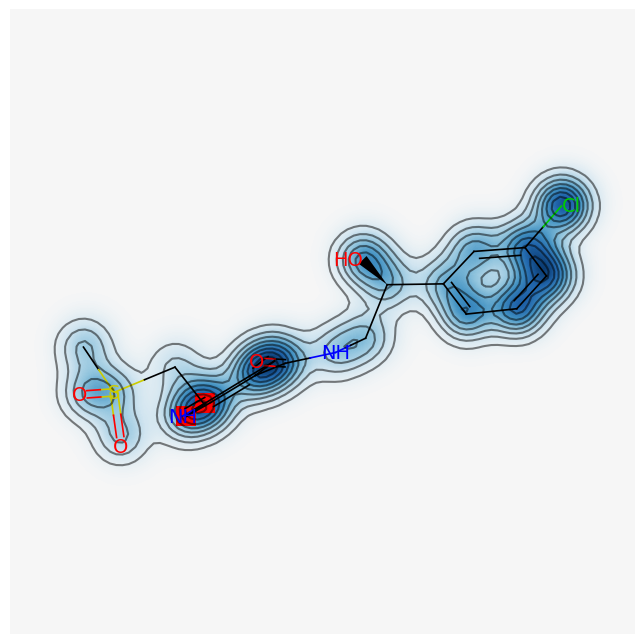

<Figure size 1300x400 with 0 Axes>

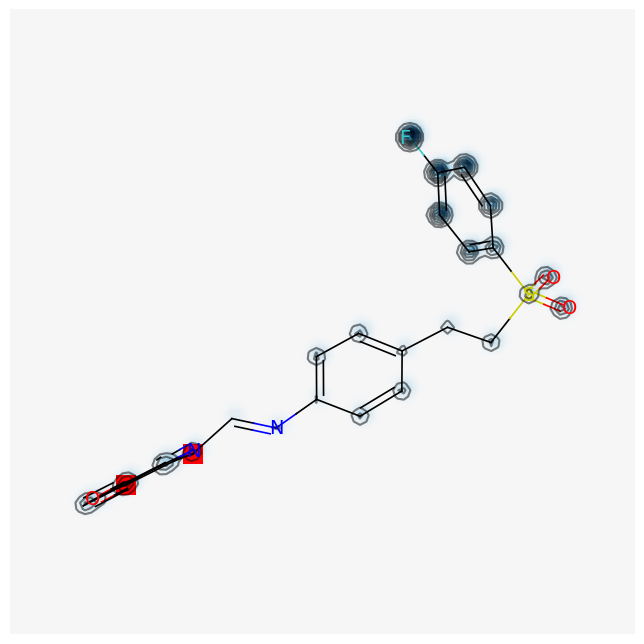

<Figure size 1300x400 with 0 Axes>

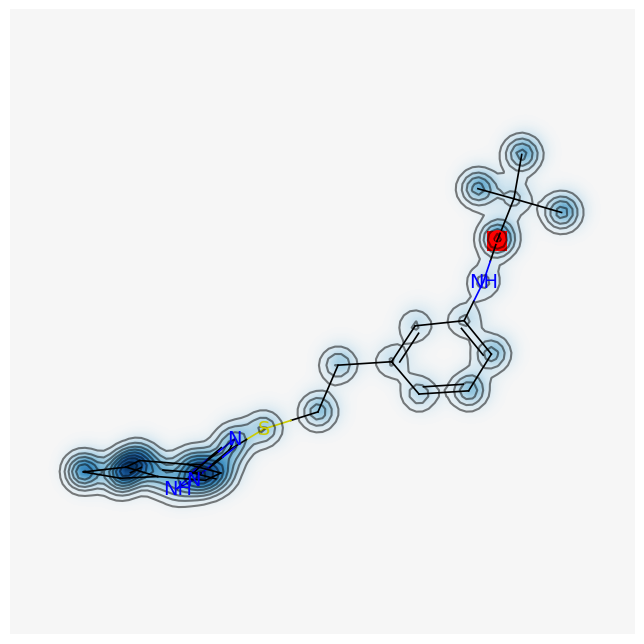

<Figure size 1300x400 with 0 Axes>

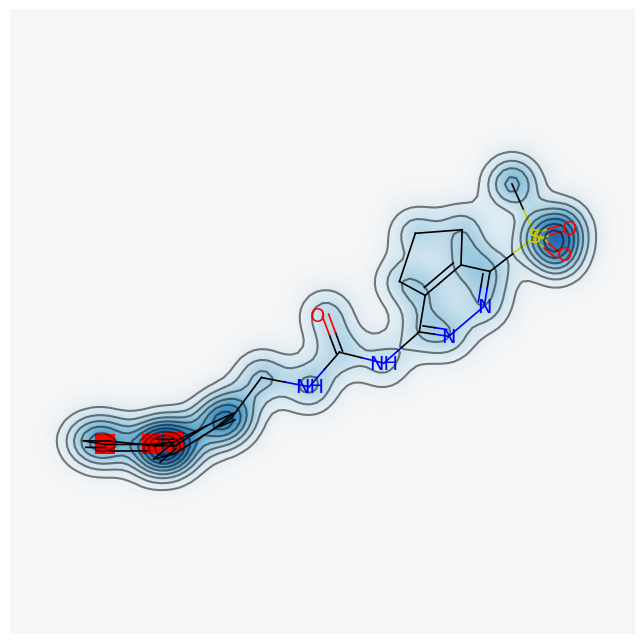

In [4]:
for p in tqdm(glob.glob("transformed2/*.pdb")[4:]):
    fig, axes = plt.subplots(1,3,figsize=(13,4))
    p2 = p.split(".")[0]
    idx = p2.split("/")[-1]

    md_universe = mda.Universe(p2+".pdb",p2+".dcd")
    protein = md_universe.select_atoms("protein")
    ligand = md_universe.select_atoms("resname UNK")
    zinc = md_universe.select_atoms("resname  ZN")
    transforms = [trans.center_in_box(protein),trans.wrap(ligand),trans.wrap(zinc)]
    md_universe.trajectory.add_transformations(*transforms)

    alignment = align.AlignTraj(mobile=md_universe,reference=md_universe,select="name CA",in_memory=True)
    alignment.run()

    md_universe.trajectory[0]
    RMSD_analysis = rms.RMSD(md_universe,reference=md_universe,select="backbone",
                            groupselections=["protein","resname UNK","resname  ZN"],ref_frame=0)
    RMSD_analysis.run()

    column_names = ['frame', 'time(ps)', 'backbone', 'protein', 'ligand',"ZN"]
    rmsd_df = pd.DataFrame(np.round(RMSD_analysis.results.rmsd, 2), columns = column_names)
    rmsd_df["time(ns)"] = rmsd_df["time(ps)"] / 1000
    ax = axes[0]
    ax.plot(rmsd_df['time(ns)'], rmsd_df['backbone'], label="backbone")
    ax.plot(rmsd_df['time(ns)'], rmsd_df['protein'], label="protein")
    ax.plot(rmsd_df['time(ns)'], rmsd_df['ligand'], label="ligand")
    ax.plot(rmsd_df['time(ns)'], rmsd_df['ZN'], label="ZN")
    ax.legend(loc="upper left")
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("RMSD [$\AA$]")
    ax.set_title("RMSD of protein and ligand")
    
    lig = md_universe.atoms.select_atoms("resname UNK")
    prot = md_universe.atoms.select_atoms("protein")
    fp = plf.Fingerprint()
    fp.run(md_universe.trajectory[::10],lig,prot)
    df_fp = fp.to_dataframe()*1
    df_fp.columns = ["{}_{}".format(v[1],v[2]) for v in df_fp.columns]
    df_fp.to_csv("df_fp/{}.csv".format(idx))

    C_alphas = md_universe.select_atoms("name CA")
    RMSF_analysis = rms.RMSF(C_alphas)
    RMSF_analysis.run()
    residue_numbers = C_alphas.resnums
    ax = axes[1]
    ax.plot(residue_numbers, RMSF_analysis.results.rmsf)
    ax.set_title("C_alpha RMSF")
    ax.set_xlabel("residue number")

    ligands = md_universe.select_atoms("resname UNK")
    RMSF_analysis = rms.RMSF(ligands)
    RMSF_analysis.run()
    lig_atom_names = [v.name for v in ligands.atoms]
    atom_numbers = ligands.n_atoms
    ax = axes[2]
    ax.plot(range(atom_numbers), RMSF_analysis.results.rmsf)
    ax.set_xticks(range(atom_numbers),lig_atom_names,rotation=90)
    ax.set_title("ligand RMSF")
    ax.set_xlabel("atom number")
    plt.tight_layout()
    plt.savefig("fig/{}.png".format(idx))
    plt.clf()

    ligand_path = "ligand2/out_smiles_240619_{}.sdf".format(idx)
    pdb = extractLigandFromPDB(ligand_path)
    mol = Chem.SDMolSupplier(ligand_path)
    mol = [v for v in mol if v != None][0]
    atoms = mol.GetNumAtoms()
    for i, txt in zip(range(atoms),pdb):
        mol.GetAtomWithIdx(i).SetProp("atomNote",txt)
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,weights=RMSF_analysis.results.rmsf,colorMap="RdBu")
    fig.savefig("fig/RMSFmap_{}.png".format(idx),bbox_inches="tight")

In [2]:
s = []
for v in glob.glob("df_fp/*.csv"):
    idx = v.split("/")[-1].split(".")[0]
    dat = pd.read_csv(v,index_col=0)
    d = pd.DataFrame(dat.mean(axis=0),columns=[idx])
    s.append(d)
res = pd.concat(s,axis=1)
res = res.fillna(0).T
res = res.sort_index()

In [3]:
idx = ['187930', '84562', '71126', '115382', '162096', '102203', '67611','31396','105992','128270','vorinostat','panobinostat']

In [4]:
hbdonor = []
for v in res.columns:
    if "HBDonor" in v:
        hbdonor.append(v)

<Axes: >

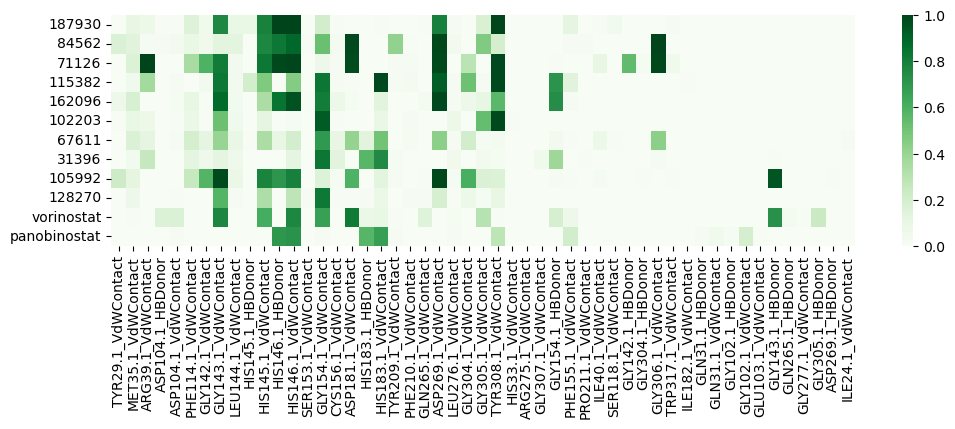

In [5]:
plt.figure(figsize=(12,3))
sns.heatmap(res.loc[idx],cmap="Greens")

<Axes: >

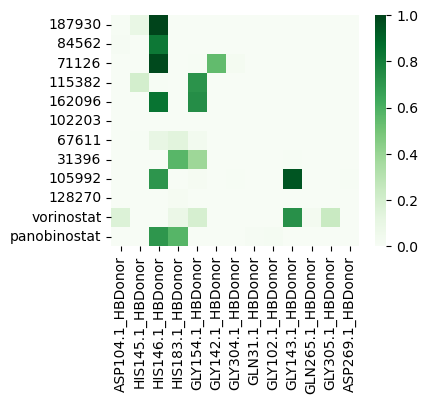

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(res.loc[idx,hbdonor],cmap="Greens")